# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key



In [42]:

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
test_cities = ["butaritari", "cape town", "insanity town"]
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="




name = []
lati = []
lngi = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 0


for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response["name"])
        lati.append(response["coord"]["lat"])
        lngi.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        count +=1
        print(f"Located city number {count} " + response["name"])
    except (KeyError, IndexError):
        print("Failed to find city")



Located city number 1 Khatanga
Located city number 2 Tiksi
Located city number 3 Castro
Located city number 4 Rodrigues Alves
Located city number 5 Punta Arenas
Located city number 6 Ushuaia
Located city number 7 Rikitea
Located city number 8 Albany
Located city number 9 Mitsamiouli
Located city number 10 Butaritari
Located city number 11 Bluff
Located city number 12 Hobart
Located city number 13 Fairbanks
Located city number 14 Puerto Ayora
Located city number 15 Arraial do Cabo
Located city number 16 Qaanaaq
Located city number 17 Tilichiki
Located city number 18 Mataura
Located city number 19 Xochistlahuaca
Located city number 20 Cabo San Lucas
Located city number 21 Kohima
Located city number 22 Kapaa
Located city number 23 Saint-Philippe
Located city number 24 Qui Nhon
Failed to find city
Located city number 25 Cidreira
Located city number 26 Hermanus
Located city number 27 Hay River
Located city number 28 Busselton
Located city number 29 Caravelas
Located city number 30 Coolum Be

Located city number 238 Farsund
Located city number 239 Kopavogur
Located city number 240 Touros
Located city number 241 Mabai
Located city number 242 Turukhansk
Failed to find city
Located city number 243 Ahipara
Located city number 244 Juba
Located city number 245 Omboué
Located city number 246 Ola
Located city number 247 Gaspé
Failed to find city
Located city number 248 Santa Clara
Located city number 249 Fărcaşa
Failed to find city
Failed to find city
Located city number 250 Lompoc
Failed to find city
Located city number 251 Cabo Rojo
Located city number 252 Verkhnetulomskiy
Located city number 253 Pitimbu
Located city number 254 Zelenoborsk
Located city number 255 Marmande
Located city number 256 Camacha
Located city number 257 Dubbo
Located city number 258 Kalininsk
Located city number 259 Zhigansk
Located city number 260 Norman Wells
Located city number 261 Tefé
Located city number 262 Kargasok
Located city number 263 Port Lincoln
Located city number 264 Quthing
Located city num

Located city number 466 Staritsa
Located city number 467 Beringovskiy
Located city number 468 Vila Velha
Located city number 469 Arkhara
Located city number 470 Vanavara
Located city number 471 Karratha
Located city number 472 Malaya Purga
Located city number 473 Tulagi
Located city number 474 The Valley
Located city number 475 Dondo
Located city number 476 Mayumba
Located city number 477 Boysun
Located city number 478 Kempele
Located city number 479 Turiaçu
Located city number 480 Broome
Located city number 481 Prince Rupert
Located city number 482 Naryan-Mar
Located city number 483 Homer
Located city number 484 Muroto-misakicho
Located city number 485 Laredo
Located city number 486 Siniscola
Located city number 487 Edelira
Located city number 488 Collie
Located city number 489 Puerto Maldonado
Located city number 490 Alofi
Located city number 491 Agüimes
Failed to find city
Failed to find city
Located city number 492 Bonthe
Located city number 493 Sakaiminato
Located city number 494 

In [45]:
weather = {
    "City": name,
    "Lat": lati,
    "Long": lngi,
    "Temp (C)": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "GMT": date}

weather_df = pd.DataFrame(weather)


In [46]:
weather_df


#Testing the json to find where the info lives
#response = requests.get(query_url + "Jersey City").json()
#print(json.dumps(response, indent=7, sort_keys=True))

,City,Lat,Long,Temp (C),Humidity,Cloudiness,Wind Speed,Country,GMT
0,Khatanga,71.97,102.50,-13.99,86,12,3.90,RU,1603043205
1,Tiksi,71.69,128.87,-7.52,96,100,8.05,RU,1603043205
2,Castro,-24.79,-50.01,20.33,74,100,3.57,BR,1603043205
3,Rodrigues Alves,-7.74,-72.65,35.41,37,69,1.51,BR,1603043205
4,Punta Arenas,-53.15,-70.92,8.00,65,75,10.80,CL,1603043072
...,...,...,...,...,...,...,...,...,...
563,Puerto Carreño,6.19,-67.49,32.49,54,48,0.48,CO,1603043003
564,Pocatello,42.87,-112.45,13.89,24,40,11.80,US,1603043002
565,Bayburt,40.26,40.23,12.17,36,17,1.30,TR,1603043259
566,Quatre Cocos,-20.21,57.76,24.00,69,40,3.60,MU,1603043259


## Convert Raw Data to DataFrame
* Save as csv

In [53]:
weather_df.to_csv('../output_data/the_cities.csv', index = False)

In [5]:
path = "../output_data/the_cities.csv"
safe_df = pd.read_csv(path)
safe_df

,City,Lat,Long,Temp (C),Humidity,Cloudiness,Wind Speed,Country,GMT
0,Khatanga,71.97,102.50,-13.99,86,12,3.90,RU,1603043205
1,Tiksi,71.69,128.87,-7.52,96,100,8.05,RU,1603043205
2,Castro,-24.79,-50.01,20.33,74,100,3.57,BR,1603043205
3,Rodrigues Alves,-7.74,-72.65,35.41,37,69,1.51,BR,1603043205
4,Punta Arenas,-53.15,-70.92,8.00,65,75,10.80,CL,1603043072
...,...,...,...,...,...,...,...,...,...
563,Puerto Carreño,6.19,-67.49,32.49,54,48,0.48,CO,1603043003
564,Pocatello,42.87,-112.45,13.89,24,40,11.80,US,1603043002
565,Bayburt,40.26,40.23,12.17,36,17,1.30,TR,1603043259
566,Quatre Cocos,-20.21,57.76,24.00,69,40,3.60,MU,1603043259


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

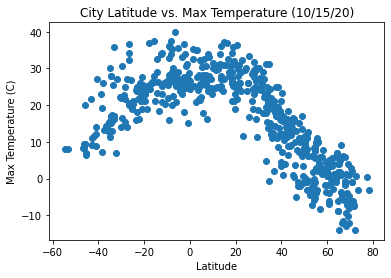

<Figure size 432x288 with 0 Axes>

In [6]:
x_values = safe_df['Lat']
y_values = safe_df['Temp (C)']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature (10/15/20)")
plt.show()
plt.savefig('../Images/lat_vs_temp.png')

#The temperature values increase at the equator.


### Latitude vs. Humidity Plot

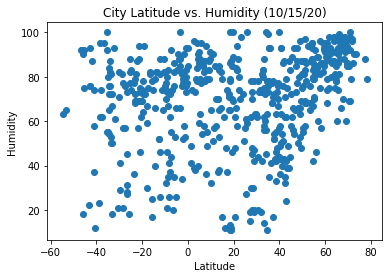

In [7]:
x_values2 = safe_df['Lat']
y_values2 = safe_df['Humidity']
plt.scatter(x_values2,y_values2)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity (10/15/20)")
plt.savefig('../Images/lat_vs_hum.png')
plt.show()

#The humidity values become more concentrated at greater latitudes.

### Latitude vs. Cloudiness Plot

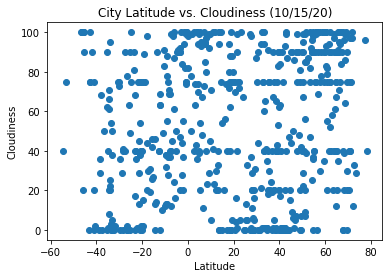

In [8]:
x_values3 = safe_df['Lat']
y_values3 = safe_df['Cloudiness']
plt.scatter(x_values3,y_values3)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Cloudiness (10/15/20)")
plt.savefig('../Images/lat_vs_cloud.png')
plt.show()

#The cloudiness values don't have much relation with latitude.

### Latitude vs. Wind Speed Plot

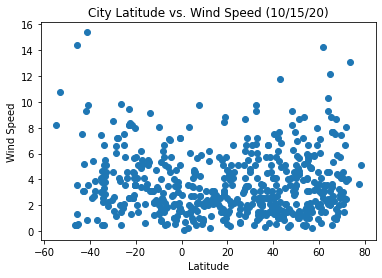

In [9]:
x_values4 = safe_df['Lat']
y_values4 = safe_df['Wind Speed']
plt.scatter(x_values4,y_values4)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed (10/15/20)")
plt.savefig('../Images/lat_vs_wind.png')
plt.show()

#The the wind speed increases at greater latitudes.

## Linear Regression

### Write linear regression plot function (optional)

In [10]:
north = safe_df.loc[safe_df["Lat"] >= 0]
south = safe_df.loc[safe_df["Lat"] < 0]


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7797453510368206


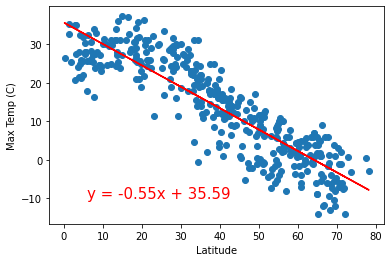

<Figure size 432x288 with 0 Axes>

In [12]:

x = north["Lat"]
y = north['Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../Images/northlat_vs_temp.png')

#There seems to be a negative relationship with latitude and temperature. Due to the equator, this makes sense.

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.42396831458207135


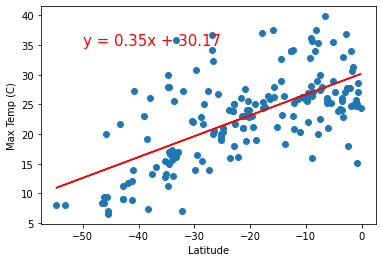

<Figure size 432x288 with 0 Axes>

In [13]:
x2 = south["Lat"]
y2 = south['Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../Images/southlat_vs_temp.png')

#On average, the temp increases as the latitude increases. Due to the equator, this makes sense.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11750944876164056


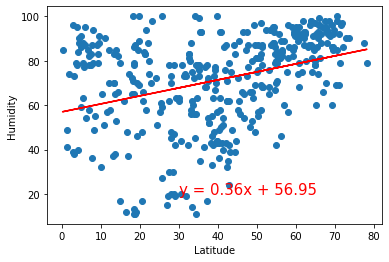

<Figure size 432x288 with 0 Axes>

In [14]:
x2 = north["Lat"]
y2 = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../Images/northlat_vs_hum.png')

#The humidity values become more concentrated at greater latitudes.

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.42396831458207135


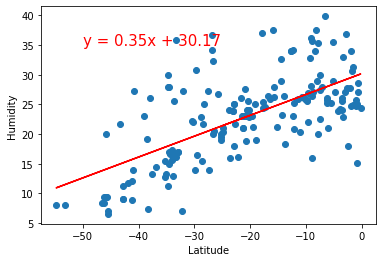

<Figure size 432x288 with 0 Axes>

In [15]:
x2 = south["Lat"]
y2 = south['Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../Images/southlat_vs_hum.png')

#The humidity values become greater at higher latitudes.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010926846965431364


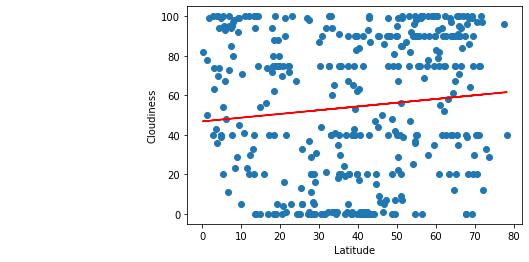

<Figure size 432x288 with 0 Axes>

In [16]:
x2 = north["Lat"]
y2 = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../Images/northlat_vs_cloud.png')

#The humidity values become more concentrated at greater latitudes.

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.020610317579574978


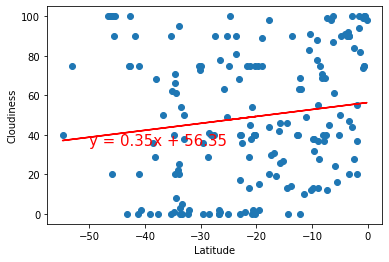

<Figure size 432x288 with 0 Axes>

In [17]:
x2 = south["Lat"]
y2 = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../Images/southlat_vs_cloud.png')

#The cloudiness values don't have much relation with latitude.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02902390691603297


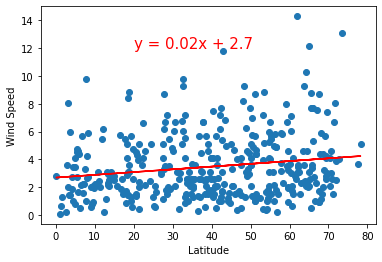

<Figure size 432x288 with 0 Axes>

In [18]:
x2 = north["Lat"]
y2 = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(20,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../Images/northlat_vs_wind.png')

#The wind speed can't be predicted, and it doesn't seem to have much relation with latitude.

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03953313249747514


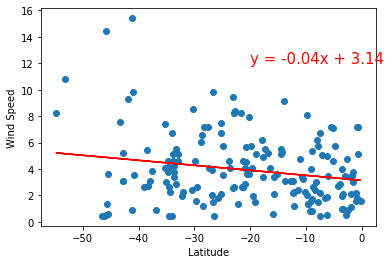

<Figure size 432x288 with 0 Axes>

In [19]:
x2 = south["Lat"]
y2 = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(-20,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../Images/southlat_vs_wind.png')

#The wind speed values get more concentrated at greater latitudes, however, no meaningful predictions can be made.